In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv('../input/titanic/train.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().mean()



PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
train1 =train.drop(['PassengerId','Cabin', 'Ticket', 'Name'],axis=1)

In [8]:
train1
train1 = train1.dropna(axis=0)

In [9]:
train1['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [10]:
train1['Embarked'] = train1['Embarked'].astype('category')
train1['Sex'] = train1['Sex'].astype('category')

train1['Embarked'] = train1['Embarked'].cat.codes
train1['Sex'] = train1['Sex'].cat.codes

In [11]:
train1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


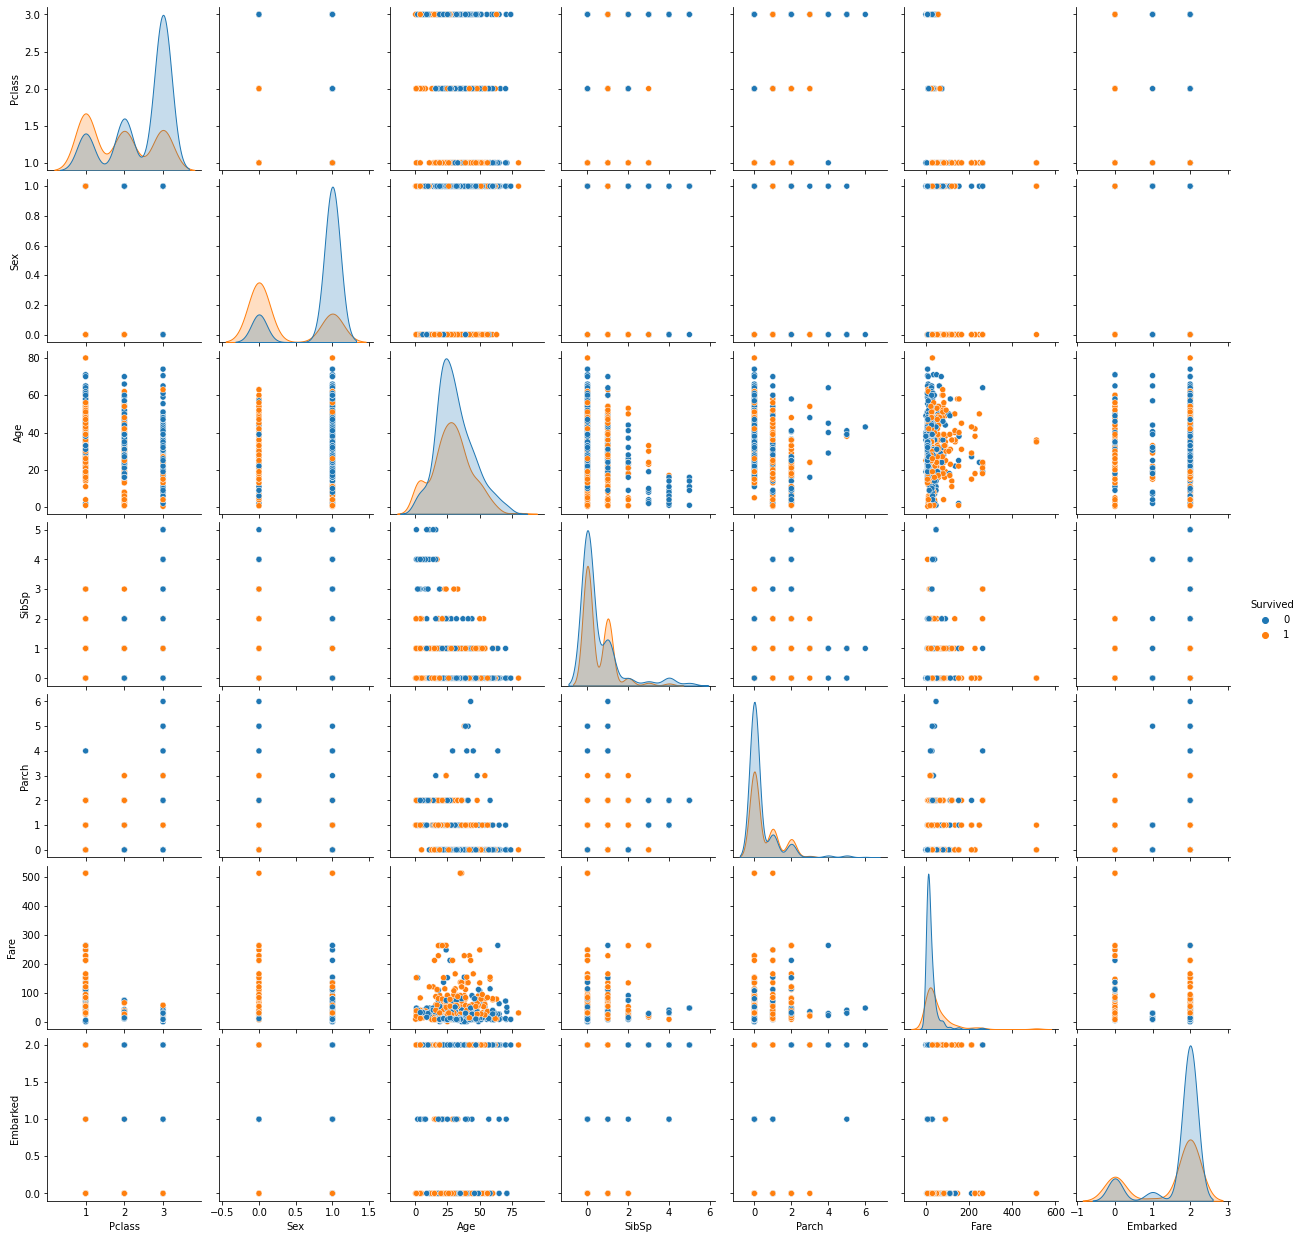

In [16]:
import seaborn as sns
sns.pairplot(train1, hue = 'Survived', diag_kind = 'kde')

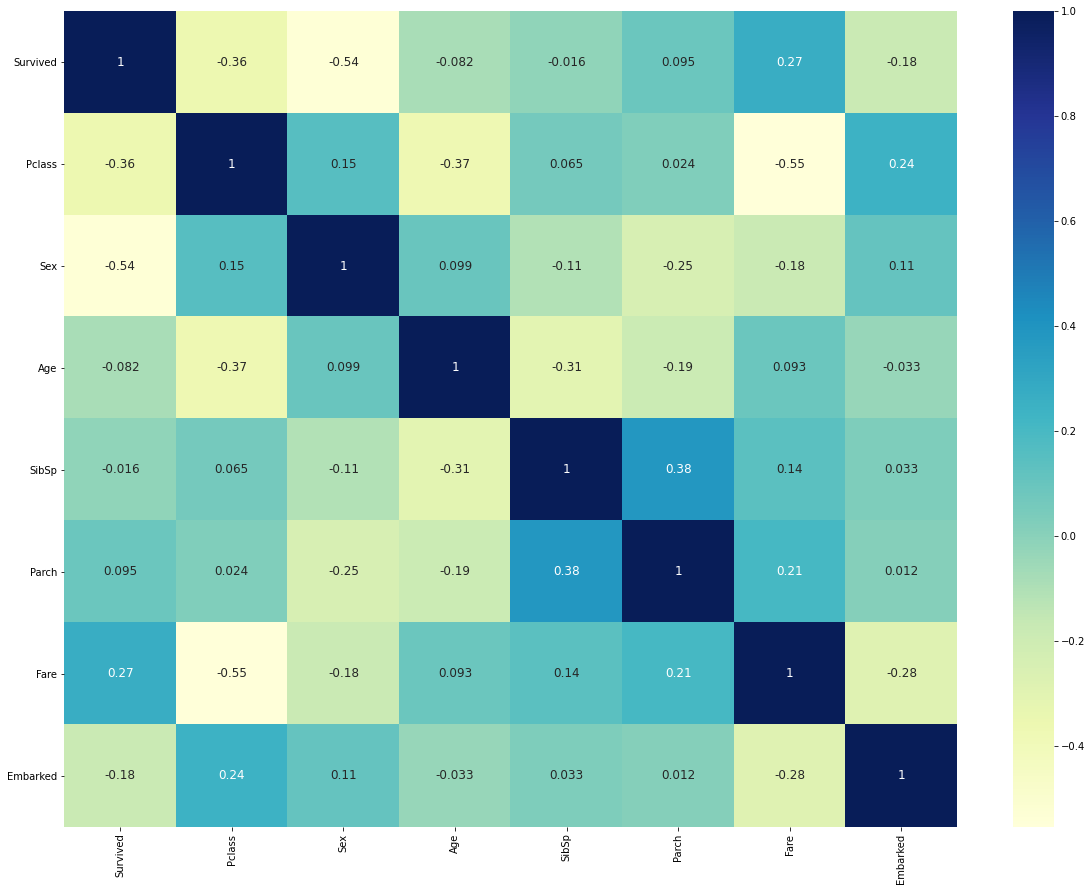

In [17]:
corr_matrix = train1.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)


In [18]:
X = train1.drop(['Survived'], axis=1)
Y=train1['Survived']
X,Y

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0         3    1  22.0      1      0   7.2500         2
 1         1    0  38.0      1      0  71.2833         0
 2         3    0  26.0      0      0   7.9250         2
 3         1    0  35.0      1      0  53.1000         2
 4         3    1  35.0      0      0   8.0500         2
 ..      ...  ...   ...    ...    ...      ...       ...
 885       3    0  39.0      0      5  29.1250         1
 886       2    1  27.0      0      0  13.0000         2
 887       1    0  19.0      0      0  30.0000         2
 889       1    1  26.0      0      0  30.0000         0
 890       3    1  32.0      0      0   7.7500         1
 
 [712 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 712, dtype: int64)

In [19]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
y_train.value_counts()

0    329
1    240
Name: Survived, dtype: int64

In [22]:

#importing libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [23]:
#dealing with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)

In [24]:
y_train_series.value_counts()

0    329
1    329
Name: Survived, dtype: int64

In [25]:

#building model
#model = LogisticRegression()
#model.fit(X_train_o, y_train_o)


#from xgboost import XGBClassifier
#model = XGBClassifier(random_state =1)

#model.fit(X_train_o, y_train_o)

X_train_o.shape, y_train_o.shape, y_test.shape



((658, 7), (658,), (143,))

In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train_o, y_train_o)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train_o, y_train_o) * 100, 2)
print(acc_decision_tree)

98.94


In [27]:
y_preds = decision_tree.predict(X_test)
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.83      0.75      0.78        95
           1       0.58      0.69      0.63        48

    accuracy                           0.73       143
   macro avg       0.70      0.72      0.71       143
weighted avg       0.74      0.73      0.73       143



In [28]:
test = pd.read_csv('../input/titanic/test.csv')
test['Embarked'] = test['Embarked'].astype('category')
test['Sex'] = test['Sex'].astype('category')

test['Embarked'] = test['Embarked'].cat.codes
test['Sex'] = test['Sex'].cat.codes

In [29]:
test =test.drop(['PassengerId','Cabin', 'Ticket', 'Name'],axis=1)

In [30]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [31]:
test.isna().mean()
test['Age'].fillna(29, inplace=True)
test['Fare'].fillna(34, inplace=True)

In [32]:
train1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,1.595506
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [33]:
test_preds = decision_tree.predict(test)
type(test_preds)

NameError: name 'model' is not defined

In [ ]:
test = pd.read_csv('../input/titanic/test.csv')


result = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_preds}, columns=['PassengerId', 'Survived'])


result['PassengerId'] = result['PassengerId'].astype('int')
result['Survived'] = result['Survived'].astype('int')
result.to_csv('result.csv', index=False)
result